### Automation of Identifiability Computations

In [3]:
from sympy import *
import copy
init_printing(use_unicode=True)

In [28]:
ddt = symbols('ddt')
a = IndexedBase('a')
b = IndexedBase('b')
k = symbols('k')

In [19]:
def parametersFromEdges(edges):
    # edges = [[1 ->], [2 ->], ..., [n ->]], that is, spot i-1 in the list has a list of outgoing edges from compartment i
    n = len(edges)
    parameters = []
    for i in range(n):
        for j in edges[i]:
            parameters.append(a[j,i+1])
    return parameters

In [20]:
def compartmentalMatrix(edges):
    # edges = [[1 ->], [2 ->], ..., [n ->]]
    n = len(edges)
    A = zeros(n,n)
    for i in range(n):
        ai = []
        for j in edges[i]:
            if j!=0:
                A[i,j-1] = a[i+1,j]
            ai.append(-a[j,i+1])
        A[i,i] = sum(ai)
    return A

In [21]:
def inputOutput(A,i,j,L,leak): #A: compartmental matrix, i: input, j: output, L: distance (on graph) from i to j, leak: 1 if there are leaks, 0 if there are no leaks
    n = A.shape[0]
    dA = ddt*eye(n) - A
    dAij = copy.deepcopy(dA)
    dAij.row_del(i-1)
    dAij.col_del(j-1)
    ycoeffs = Poly(det(dA),ddt).coeffs()
    ucoeffs = Poly(det(dAij),ddt).coeffs()
    ycoeffs.remove(1)
    if L==0:
        ucoeffs.remove(1)
    return ycoeffs + ucoeffs
    print(ycoeffs,ucoeffs)
    #if leak == 1:
    #    nontrivycoeffs = ycoeffs[1:n+1]
    #if leak == 0:
    #    nontrivycoeffs = ycoeffs[1:n]
    #if L == 0:
    #    nontrivucoeffs = ucoeffs[1:n]
    #if L != 0:
    #    nontrivucoeffs = ucoeffs
    #print(nontrivycoeffs,nontrivucoeffs)

In [22]:
def modelJacobian(p,c):
    return Matrix(c).jacobian(Matrix(p))

In [23]:
def isIdentifiable(edges,i,j,L,leak):
    p = parametersFromEdges(edges)
    A = compartmentalMatrix(edges)
    c = inputOutput(A,i,j,L,leak)
    J = modelJacobian(p,c)
    return J.rank() == J.shape[1]

### Example below here!

In [24]:
A = compartmentalMatrix([[2,0],[1,3],[2,0]]) #this is the 3-compartment catenary model with leaks on 1 and 3
A

⎡-a[0, 1] - a[2, 1]       a[1, 2]                0         ⎤
⎢                                                          ⎥
⎢     a[2, 1]        -a[1, 2] - a[3, 2]       a[2, 3]      ⎥
⎢                                                          ⎥
⎣        0                a[3, 2]        -a[0, 3] - a[2, 3]⎦

In [25]:
c = inputOutput(A,1,1,0,1)
c

In [26]:
c2 = poly(c[0]) #ci/di is the coefficient of ith derivative of y/u
c1 = poly(c[1])
c0 = poly(c[2])
d1 = poly(c[3])
d0 = poly(c[4])

In [29]:
x = (b[0,1]-(k-1)*b[2,1],b[0,3]+b[1,2]*(k-1)/k,b[1,2]/k,k*b[2,1],b[2,3]+b[1,2]/k,b[3,2]-b[1,2]/k)

In [30]:
simplify(c2.eval(x))

In [31]:
simplify(d1.eval((x[1],x[2],x[4],x[5])))

In [32]:
d1

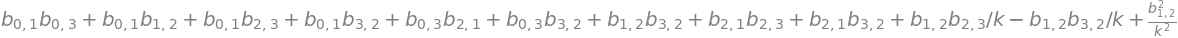

In [33]:
(c1.eval(x))

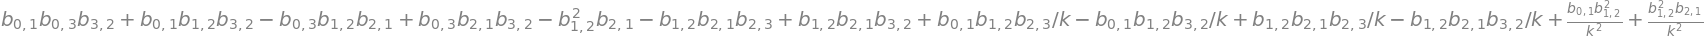

In [34]:
(c0.eval(x))

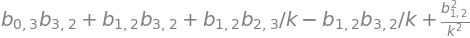

In [35]:
(d0.eval((x[1],x[2],x[4],x[5])))

In [37]:
p = parametersFromEdges([[2,0],[1,3],[2,0]])

In [38]:
J = modelJacobian(p,c) 
J

⎡             1                                        1                      
⎢                                                                             
⎢a[0, 3] + a[2, 3] + a[3, 2]         a[0, 3] + a[1, 2] + a[2, 3] + a[3, 2]    
⎢                                                                             
⎢      a[0, 3]⋅a[3, 2]        a[0, 3]⋅a[1, 2] + a[0, 3]⋅a[3, 2] + a[1, 2]⋅a[2,
⎢                                                                             
⎢             0                                        0                      
⎢                                                                             
⎣             0                                        0                      

                     1                                  1                     
                                                                              
        a[0, 1] + a[0, 3] + a[2, 3]        a[0, 1] + a[0, 3] + a[2, 1]     a[0
                                                   

In [39]:
J.rank()

In [40]:
det(J[:,[0,1,2,3,4]]) #excluding da23/dt column

In [41]:
det(J[:,[0,1,2,3,5]]) #excluding da02/dt column

In [42]:
det(J[:,[0,1,2,4,5]]) #excluding da32/d2 column

In [43]:
det(J[:,[0,1,3,4,5]]) #excluding da12/dt column

In [44]:
det(J[:,[0,2,3,4,5]]) #excluding da01/dt column

In [45]:
det(J[:,[1,2,3,4,5]]) #excluding da21/dt column

The Jacobian minors that are zero are the ones where I exclude the column where I take the derivative with respect to $a_{2,3}$ or $a_{3,2}$.

## BELOW IS FOO

In [ ]:
(c[1]-c[4])

In [ ]:
simplify((c[1]-c[5])/a[2,1])

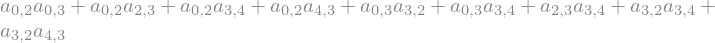

In [ ]:
simplify((c[2]-c[6])/a[2,1])

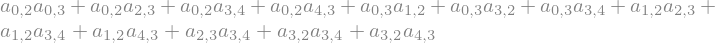

In [ ]:
c[5]

In [ ]:
isIdentifiable([[2],[1,3],[2]],1,2,1,1)

Example below here is Model 1 from homework sheet.

In [ ]:
p = parametersFromEdges([[0,2],[0,1,3],[2]])
p

In [ ]:
A = compartmentalMatrix([[0,2],[0,1,3],[2]])
A

In [ ]:
c = inputOutput(A,1,2,1,1)
c

In [ ]:
J = modelJacobian(p,c)
J

In [ ]:
J.rank() == J.shape[1]